In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as fplt
import sqlite3

In [111]:
pd.options.display.float_format = "{:,.2f}".format
np.set_printoptions(formatter={'all':lambda x: str(x)})

In [47]:
connection = sqlite3.connect('./data/GBPUSD.db')
df = pd.read_sql_query("SELECT * FROM result_table_2010", connection, parse_dates=True)

In [48]:
df.head()

,numClass,x_pos,y_pos,time_name_pattern
0,98,9,8,1262304000
1,98,9,8,1262305800
2,98,9,8,1262307600
3,98,9,8,1262309400
4,98,9,8,1262311200


In [49]:
df = df.rename({'time_name_pattern': 'date'}, axis=1)

In [50]:
df.date = pd.to_datetime(df.date, unit='s')

In [51]:
df.head()

,numClass,x_pos,y_pos,date
0,98,9,8,2010-01-01 00:00:00
1,98,9,8,2010-01-01 00:30:00
2,98,9,8,2010-01-01 01:00:00
3,98,9,8,2010-01-01 01:30:00
4,98,9,8,2010-01-01 02:00:00


In [52]:
index = df.date
df = df.drop('date', axis=1)
df.index = index

In [53]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [54]:
df.head()

,numClass,x_pos,y_pos
date,,,
2010-01-01 00:00:00,98,9,8
2010-01-01 00:30:00,98,9,8
2010-01-01 01:00:00,98,9,8
2010-01-01 01:30:00,98,9,8
2010-01-01 02:00:00,98,9,8


In [57]:
class_count = df.groupby('numClass', as_index=False).agg({'x_pos': 'count'}).rename({'x_pos': 'count'}, axis=1)

In [59]:
class_count.head()

,numClass,count
0,0,554
1,1,79
2,2,97
3,3,78
4,4,68


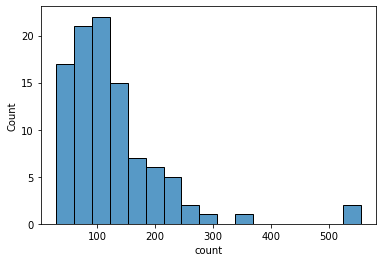

In [62]:
sns.histplot(data=class_count, x='count');

In [65]:
class_count_axis = df.groupby(['x_pos', 'y_pos'], as_index=False)\
    .agg({'numClass': 'count'}).rename({'numClass': 'count'}, axis=1)

In [96]:
class_count_axis.head()

,x_pos,y_pos,count
0,0,0,554
1,0,1,79
2,0,2,97
3,0,3,78
4,0,4,68


In [82]:
class_count_axis.isna().sum()

x_pos    0
y_pos    0
count    0
dtype: int64

In [92]:
count_matrix = np.ndarray(shape=(10, 10))

for x in set(class_count_axis.x_pos):
    for y in set(class_count_axis.y_pos):
        try:
            count_matrix[x, y] = class_count_axis.loc[(class_count_axis.x_pos == x) & (class_count_axis.y_pos == y)]['count']\
                                .values[0]
        except Exception:
            count_matrix[x, y] = 0

In [104]:
count_matrix

array([[554.,  79.,  97.,  78.,  68.,  41.,  32., 147., 102.,   0.],
       [195., 256., 132.,  94.,  98.,  77.,  46., 149.,  78.,  98.],
       [127., 138., 111., 151., 113., 240.,  85.,  65., 127.,  54.],
       [ 77., 122., 171.,  91., 120.,  77.,  93.,  73.,  93., 210.],
       [ 76., 150., 118., 129.,  43.,  55.,  36., 297.,  98.,  56.],
       [ 68.,  64., 118.,  46.,  87.,  75.,  76., 164., 106., 105.],
       [187.,  96.,  37.,  29.,  38.,  89., 244., 208., 150., 116.],
       [ 51., 174.,  36.,  79.,  67.,  56., 154., 180., 148., 225.],
       [250.,  35., 104., 179., 149., 137., 182., 136.,  93., 212.],
       [ 97., 215.,  41.,  63.,  82., 121., 198., 224., 353., 541.]])

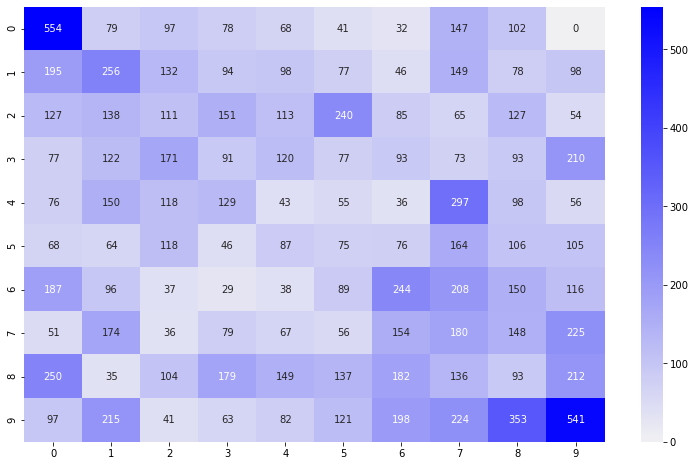

In [126]:
plt.figure(figsize=(13, 8))
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(count_matrix, annot=True, cmap=cmap, fmt='g');
plt.savefig("count_matrix_2010.png")

In [80]:
class_count_axis[((class_count_axis.x_pos == 0) & (class_count_axis.y_pos == 0))]['count'].values[0]

554